<a href="https://colab.research.google.com/github/mrturizo/soccer-international-matches_prediction/blob/main/VFINAL_INTL_%C3%BAltimos_a%C3%B1os_Partidos_de_f%C3%BAtbol_V2_(sin_conocer_score_final%2C_ni_estado_de_juego_durante)_MINIPROYECTO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| Header | Definition |
| --- | --- |
| date | The date of the match (YYYY-MM-DD) |
| league_id | A unique identifier for the league this match was played in |
| league | The name of the league this match was played in |
| team1 | The home team's name |
| team2 | The away team's name |
| spi1 | The home team's overall SPI rating before the match |
| spi2 | The away team's overall SPI rating before the match |
| prob1 | The probability of the home team winning the match |
| prob2 | The probability of the away team winning the match |
| probtie | The probability of match ending in a draw (if applicable) |
| proj_score1 | The number of goals we expected the home team to score |
| proj_score2 | The number of goals we expected the away team to score |
| importance1 | The importance of the match for the home team (0-100) |
| importance2 | The importance of the match for the away team (0-100) |
| score1 | The number of goals scored by the home team |
| score2 | The number of goals scored by the away team |
| xg1 | The number of expected goals created by the home team |
| xg2 | The number of expected goals created by the away team |
| nsxg1 | The number of non-shot expected goals created by the home team |
| nsxg2 | The number of non-shot expected goals created by the away team |
| adj_score1 | The number of goals scored by the home team, adjusted for game state |
| adj_score2 | The number of goals scored by the home team, adjusted for game state |


#Librerias Necesarias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError

# Lectura International matches Dataset




In [ ]:
# Reading data
data_df = pd.read_csv('spi_matches_intl.csv') 
print(data_df.shape)
data_df.head()

(4526, 23)


,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2019,2019-01-02,1929,International Match,Thailand,Oman,31.12,37.36,0.3724,0.2706,...,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,2019-01-05,1933,AFC Asian Cup,United Arab Emirates,Bahrain,37.82,40.38,0.4055,0.1743,...,NaN,NaN,1.0,1.0,2.29,1.63,0.96,0.59,1.05,1.05
2,2019,2019-01-06,1933,AFC Asian Cup,Australia,Jordan,68.22,42.06,0.6973,0.0633,...,NaN,NaN,0.0,1.0,1.45,0.50,2.59,0.44,0.00,1.05
3,2019,2019-01-06,1933,AFC Asian Cup,Thailand,India,29.21,17.97,0.6167,0.1209,...,NaN,NaN,1.0,4.0,0.80,1.54,0.89,0.83,1.05,3.94
4,2019,2019-01-06,1933,AFC Asian Cup,Syria,Palestine,50.32,30.05,0.6850,0.1061,...,NaN,NaN,0.0,0.0,0.98,0.10,1.08,0.02,0.00,0.00


In [ ]:
datos=data_df

In [ ]:
datos=datos.drop(["season", "date", "league_id", "league", "importance1", "importance2"], axis= 1)
datos.head()

,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,Thailand,Oman,31.12,37.36,0.3724,0.2706,0.3570,0.99,0.79,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,United Arab Emirates,Bahrain,37.82,40.38,0.4055,0.1743,0.4202,0.84,0.44,1.0,1.0,2.29,1.63,0.96,0.59,1.05,1.05
2,Australia,Jordan,68.22,42.06,0.6973,0.0633,0.2394,1.69,0.32,0.0,1.0,1.45,0.50,2.59,0.44,0.00,1.05
3,Thailand,India,29.21,17.97,0.6167,0.1209,0.2623,1.64,0.57,1.0,4.0,0.80,1.54,0.89,0.83,1.05,3.94
4,Syria,Palestine,50.32,30.05,0.6850,0.1061,0.2088,2.09,0.68,0.0,0.0,0.98,0.10,1.08,0.02,0.00,0.00


#Exploración de Variables (EDA)

##Verificación de variables no nulas

In [ ]:
datos.info()
total = datos.isnull().sum().sort_values(ascending=False)
percent_1 = datos.isnull().sum()/datos.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(datos.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4526 entries, 0 to 4525
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   team1        4526 non-null   object 
 1   team2        4526 non-null   object 
 2   spi1         4526 non-null   float64
 3   spi2         4526 non-null   float64
 4   prob1        4526 non-null   float64
 5   prob2        4526 non-null   float64
 6   probtie      4526 non-null   float64
 7   proj_score1  4526 non-null   float64
 8   proj_score2  4526 non-null   float64
 9   score1       3812 non-null   float64
 10  score2       3812 non-null   float64
 11  xg1          1907 non-null   float64
 12  xg2          1907 non-null   float64
 13  nsxg1        1907 non-null   float64
 14  nsxg2        1907 non-null   float64
 15  adj_score1   1907 non-null   float64
 16  adj_score2   1907 non-null   float64
dtypes: float64(15), object(2)
memory usage: 601.2+ KB


,Total,%
adj_score2,2619,57.9
adj_score1,2619,57.9
nsxg2,2619,57.9
nsxg1,2619,57.9
xg2,2619,57.9
xg1,2619,57.9
score1,714,15.8
score2,714,15.8
team1,0,0.0
team2,0,0.0


In [ ]:
datos = datos.dropna()

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1907 entries, 1 to 4266
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   team1        1907 non-null   object 
 1   team2        1907 non-null   object 
 2   spi1         1907 non-null   float64
 3   spi2         1907 non-null   float64
 4   prob1        1907 non-null   float64
 5   prob2        1907 non-null   float64
 6   probtie      1907 non-null   float64
 7   proj_score1  1907 non-null   float64
 8   proj_score2  1907 non-null   float64
 9   score1       1907 non-null   float64
 10  score2       1907 non-null   float64
 11  xg1          1907 non-null   float64
 12  xg2          1907 non-null   float64
 13  nsxg1        1907 non-null   float64
 14  nsxg2        1907 non-null   float64
 15  adj_score1   1907 non-null   float64
 16  adj_score2   1907 non-null   float64
dtypes: float64(15), object(2)
memory usage: 268.2+ KB


## Análisis de variables y creación de nueva variable

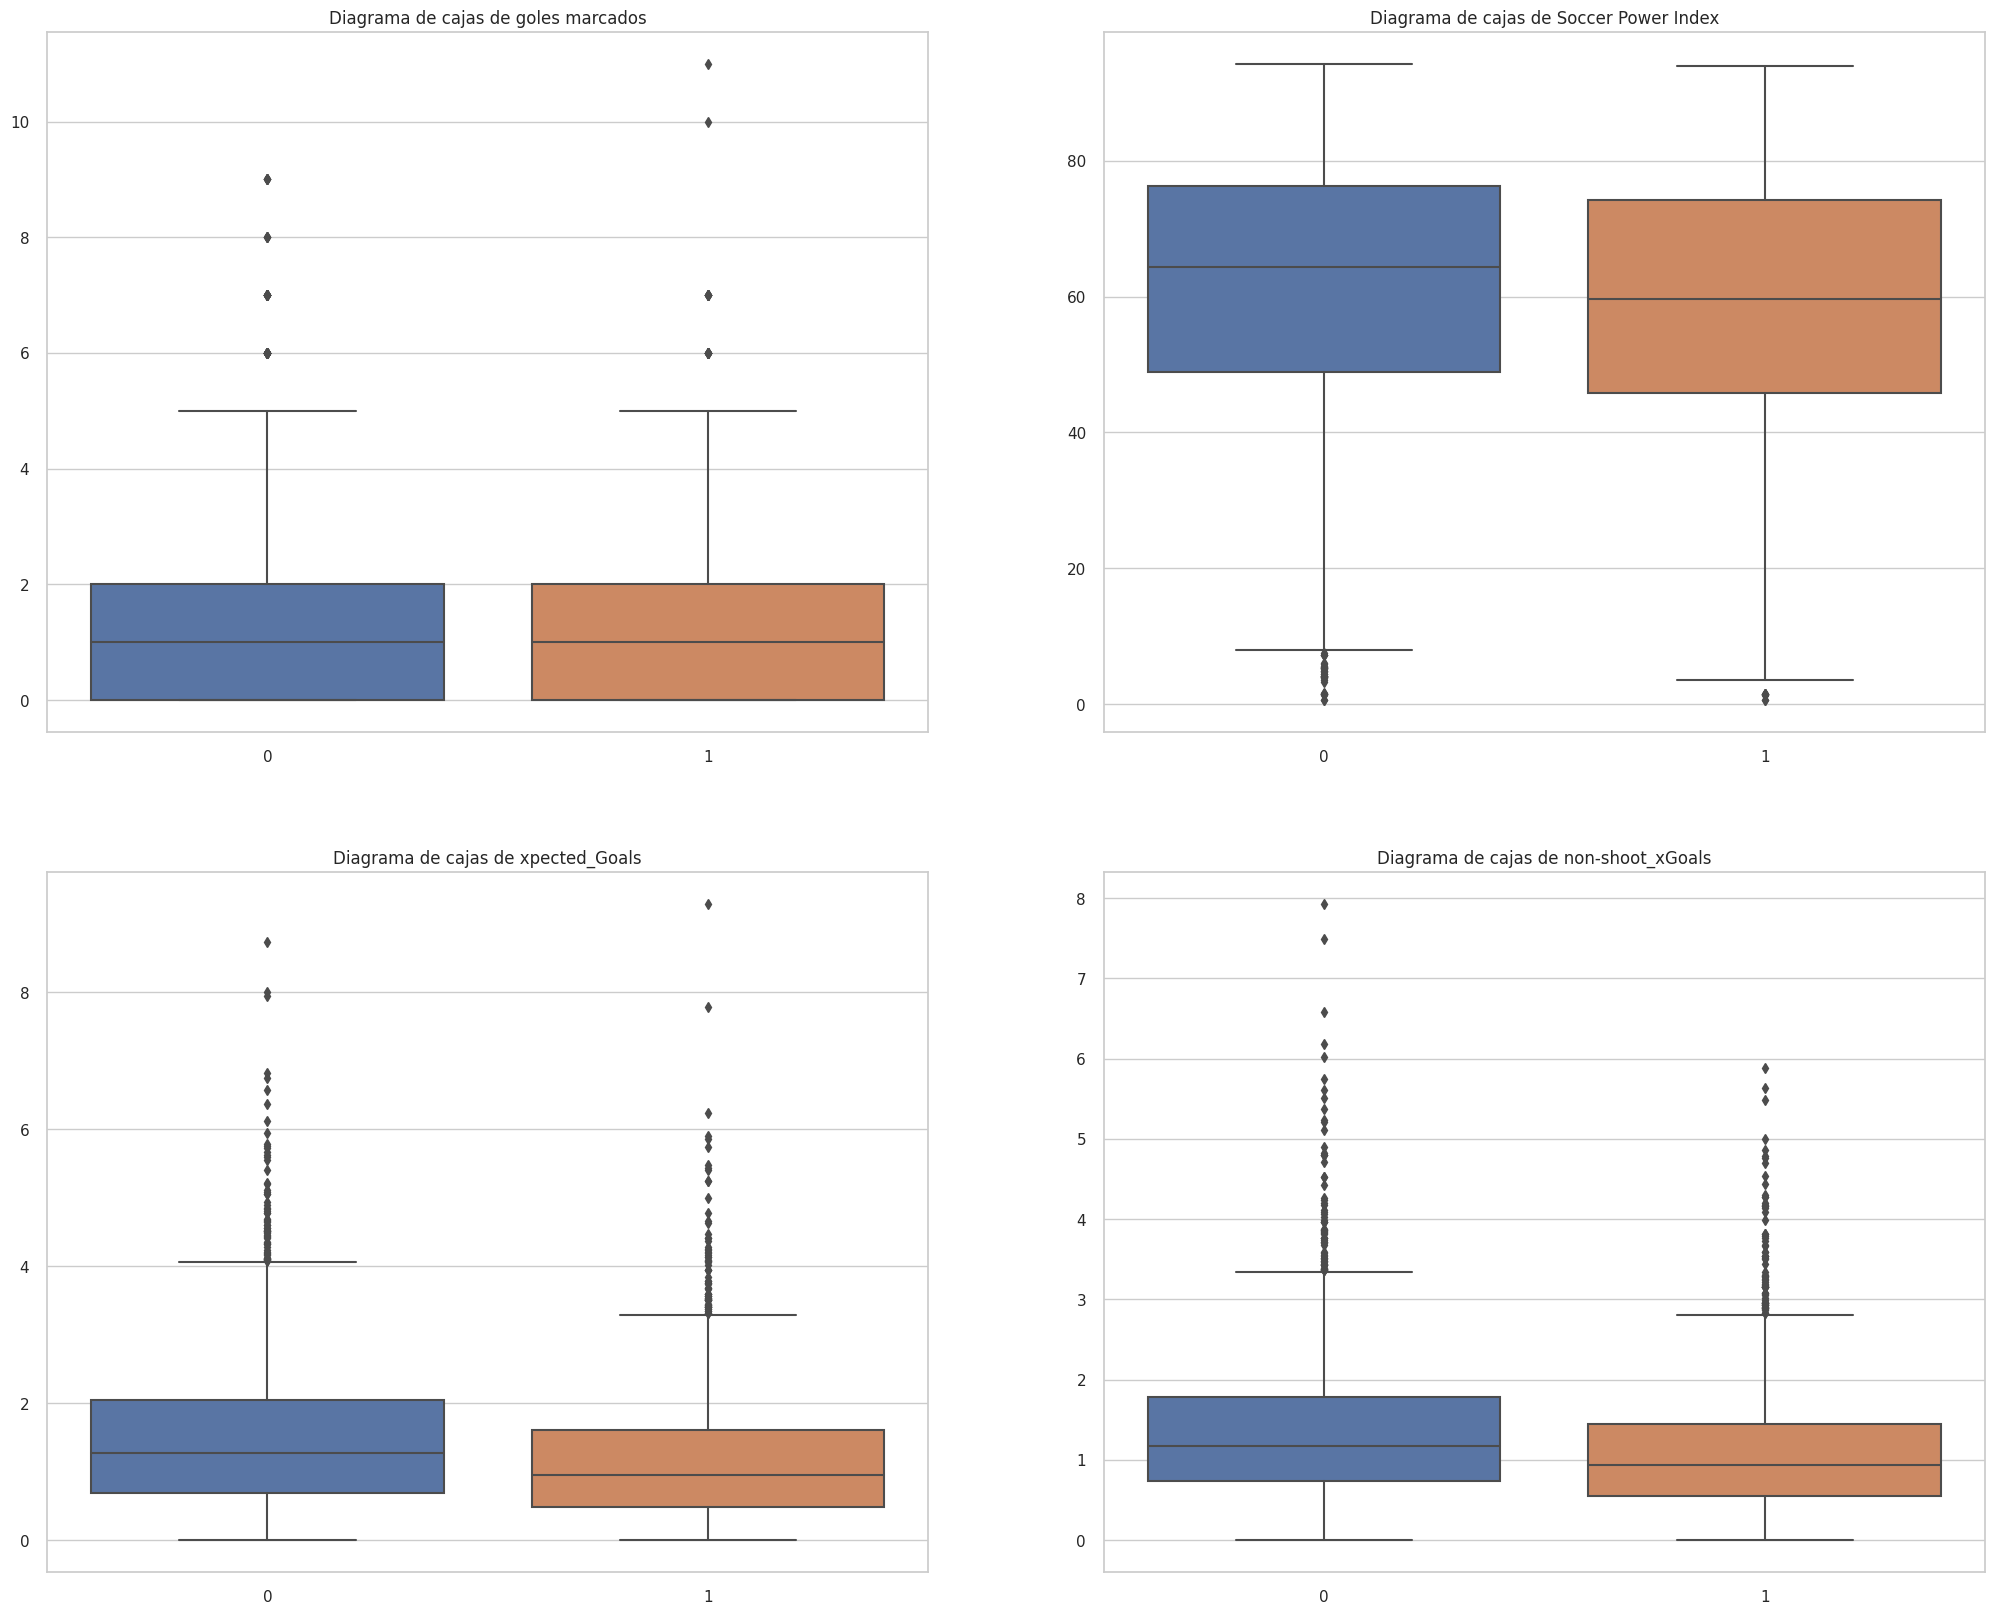

In [ ]:
# Realizar un diagrama de cajas de las variables de mayor interés
sns.set(style="whitegrid")
fig, ax = plt.subplots(2, 2, figsize=(25, 20))

sns.boxplot([datos["score1"],datos["score2"]], ax=ax[0,0])
ax[0,0].set_title("Diagrama de cajas de goles marcados")

sns.boxplot([datos["spi1"],datos["spi2"]], ax=ax[0,1])
ax[0,1].set_title("Diagrama de cajas de Soccer Power Index")

sns.boxplot([datos["xg1"],datos["xg2"]], ax=ax[1,0])
ax[1,0].set_title("Diagrama de cajas de xpected_Goals")

sns.boxplot([datos["nsxg1"],datos["nsxg2"]], ax=ax[1,1])
ax[1,1].set_title("Diagrama de cajas de non-shoot_xGoals")


plt.show()

In [ ]:
#Making a new colum named "Win_Statues" to store the result(Win,Lost,Draw) of the home team

conditions  = [datos["score1"] ==datos["score2"], datos["score1"] > datos["score2"] , datos["score1"] < datos["score2"]]
choices     = [ "Draw", 'Win', 'Lost' ]
datos["Win_Statues"] = np.select(conditions, choices)
datos.head(5)

,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,Win_Statues
1,United Arab Emirates,Bahrain,37.82,40.38,0.4055,0.1743,0.4202,0.84,0.44,1.0,1.0,2.29,1.63,0.96,0.59,1.05,1.05,Draw
2,Australia,Jordan,68.22,42.06,0.6973,0.0633,0.2394,1.69,0.32,0.0,1.0,1.45,0.50,2.59,0.44,0.00,1.05,Lost
3,Thailand,India,29.21,17.97,0.6167,0.1209,0.2623,1.64,0.57,1.0,4.0,0.80,1.54,0.89,0.83,1.05,3.94,Lost
4,Syria,Palestine,50.32,30.05,0.6850,0.1061,0.2088,2.09,0.68,0.0,0.0,0.98,0.10,1.08,0.02,0.00,0.00,Draw
5,China,Kyrgyzstan,49.85,24.93,0.6985,0.0437,0.2578,1.54,0.20,2.0,1.0,0.85,0.87,1.63,1.10,2.10,1.05,Win


## Mapa de Calor: Correlación (variables numéricas)

In [ ]:
datosnum=datos._get_numeric_data()

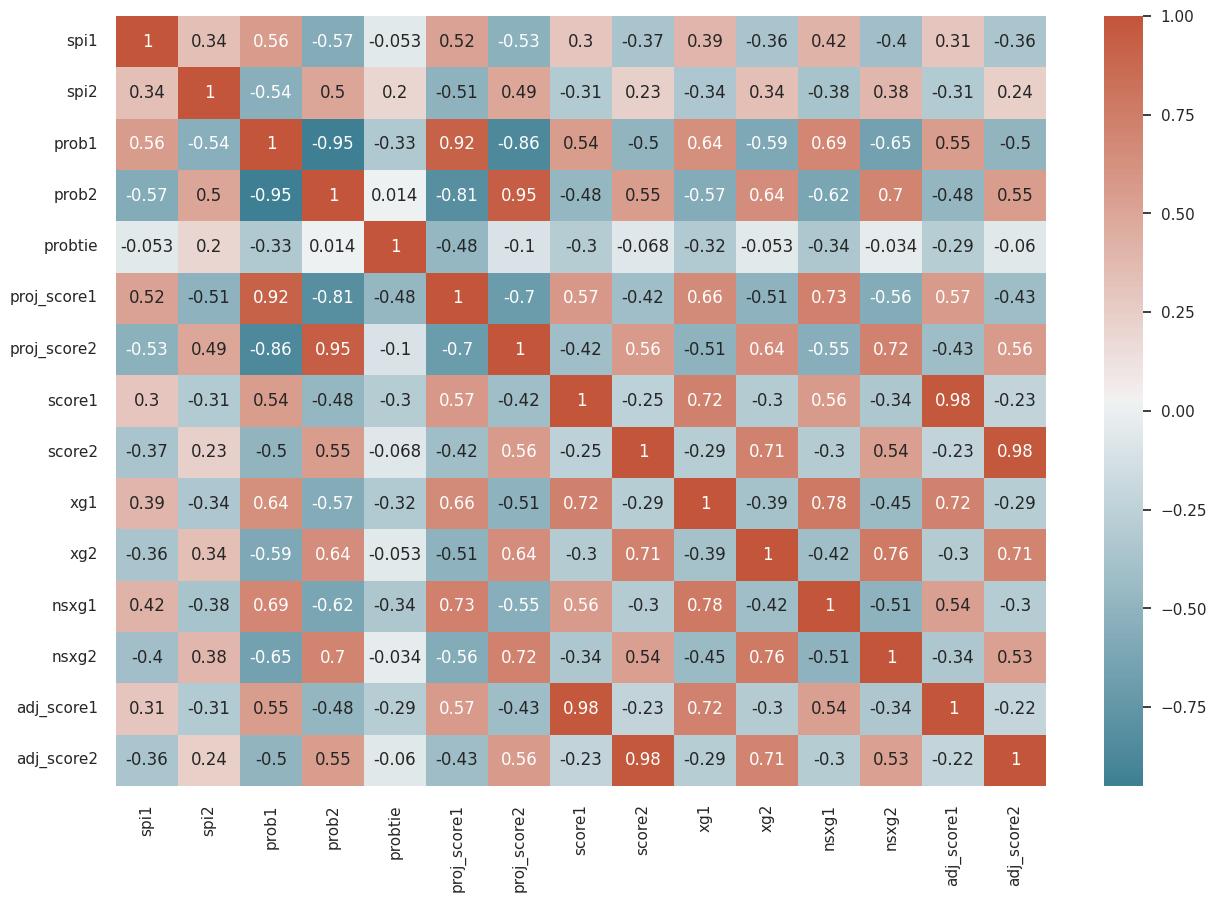

In [ ]:
corr = datosnum.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

In [ ]:
datosnum.describe()

,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
count,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000
mean,60.240304,58.035354,0.441031,0.314644,0.244323,1.462050,1.146675,1.543262,1.158888,1.506576,1.173346,1.369691,1.098144,1.530477,1.159995
std,21.412988,21.154579,0.234412,0.221488,0.073726,0.690245,0.671341,1.538451,1.303168,1.122373,0.968980,0.919561,0.790698,1.478947,1.268720
min,0.640000,0.600000,0.001200,0.000500,0.000000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.850000,45.820000,0.253000,0.139100,0.212050,1.000000,0.690000,0.000000,0.000000,0.685000,0.480000,0.740000,0.550000,0.000000,0.000000
50%,64.340000,59.620000,0.432900,0.268300,0.265800,1.370000,1.020000,1.000000,1.000000,1.270000,0.950000,1.170000,0.940000,1.050000,1.050000
75%,76.255000,74.275000,0.607200,0.456050,0.294250,1.780000,1.450000,2.000000,2.000000,2.040000,1.610000,1.780000,1.450000,2.100000,2.100000
max,94.260000,93.950000,0.995200,0.989300,0.420400,6.390000,6.130000,9.000000,11.000000,8.730000,9.290000,7.930000,5.880000,8.830000,11.270000


## Distribución de las Clases en el dataset

In [ ]:
#See what are the Countries in the dataset

countries=datos.team1.unique()
print(f"There are {len(countries)} Countries in the home_team Column\n")
print(f"Countries-{countries}")

There are 156 Countries in the home_team Column

Countries-['United Arab Emirates' 'Australia' 'Thailand' 'Syria' 'China'
 'South Korea' 'Iran' 'Iraq' 'Saudi Arabia' 'Japan' 'Uzbekistan' 'Qatar'
 'Bahrain' 'Jordan' 'India' 'Palestine' 'Philippines' 'Kyrgyzstan'
 'Vietnam' 'Yemen' 'Lebanon' 'North Korea' 'Oman' 'Turkmenistan' 'USA'
 'Germany' 'Wales' 'Kazakhstan' 'Cyprus' 'Kosovo' 'Croatia'
 'Northern Ireland' 'Netherlands' 'Slovakia' 'North Macedonia' 'Austria'
 'Belgium' 'Israel' 'Bulgaria' 'Andorra' 'Moldova' 'England' 'Luxembourg'
 'Albania' 'Portugal' 'Argentina' 'Peru' 'Mexico' 'Georgia' 'Gibraltar'
 'Sweden' 'Brazil' 'Malta' 'Italy' 'Liechtenstein' 'Spain'
 'Bosnia and Herzegovina' 'Hungary' 'San Marino' 'Poland' 'Slovenia'
 'Turkey' 'France' 'Montenegro' 'Armenia' 'Morocco' 'Ireland' 'Norway'
 'Czech Republic' 'Switzerland' 'Romania' 'Honduras' 'Venezuela'
 'Colombia' 'Chile' 'Faroe Islands' 'Latvia' 'Lithuania' 'Denmark'
 'Ukraine' 'Uruguay' 'Iceland' 'Azerbaijan' 'Estonia' 'Fi

Rows, Columns: (1907, 18)
Win_Statues
Draw    427
Lost    601
Win     879
dtype: int64 ['Draw' 'Lost' 'Win'] [427 601 879]


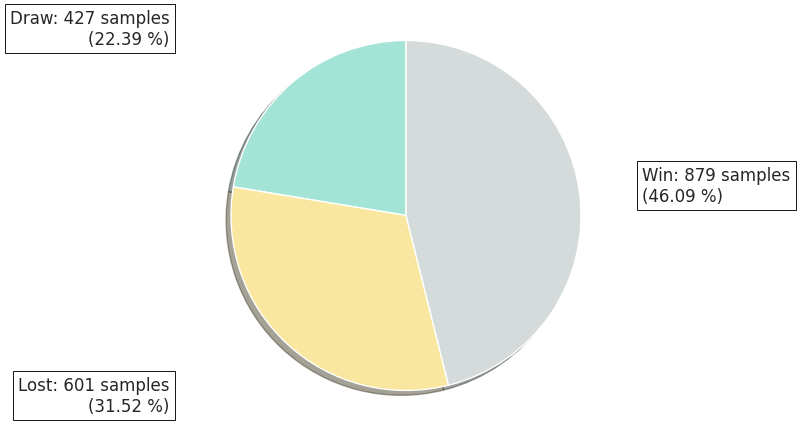

In [ ]:
print("Rows, Columns:",datos.shape)
Clases = datos.groupby('Win_Statues').size()
labels = Clases.index.values
sizes = Clases.values
print(Clases,labels,sizes)
muestra = []

for k in range(0,labels.size):
  texto = str(labels[k])+': '+str(sizes[k])+' samples\n({:,.2f} %)'.format((100*sizes[k]/sum(sizes)))
  muestra.append(texto)

colors = ['#A3E4D7','#F9E79F','#D5DBDB','#E6B0AA','#D7BDE2','#A9CCE3','#AEB6BF','#EDBB99','#5DADE2','#F4D03F','#27AE60','#A569BD','#C0392B','#138D75']
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),bbox=bbox_props, zorder=0, va="center")
fig,ax1 = plt.subplots(figsize=(10,5),ncols=1,nrows=1)
wedges, texts = ax1.pie(sizes, shadow=True, colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(muestra[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
# Separar variables independientes y etiquetas
X = datos.drop(["Win_Statues"], axis=1)
y = datos["Win_Statues"]

# Sobremuestrear la clase minoritaria
oversampler = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversampler.fit_resample(X, y)

# Crear un nuevo DataFrame con las variables independientes y etiquetas sobremuestreadas
datos_over = pd.concat([pd.DataFrame(X_over), pd.DataFrame(y_over, columns=["Win_Statues"])], axis=1)

# Verificar que las clases estén balanceadas
print(datos_over["Win_Statues"].value_counts())

Draw    879
Win     879
Lost    601
Name: Win_Statues, dtype: int64


In [ ]:
# Separar variables independientes y etiquetas
X = datos_over.drop(["Win_Statues"], axis=1)
y = datos_over["Win_Statues"]

# Sobremuestrear la clase minoritaria
oversampler = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversampler.fit_resample(X, y)

# Crear un nuevo DataFrame con las variables independientes y etiquetas sobremuestreadas
datos_over2 = pd.concat([pd.DataFrame(X_over), pd.DataFrame(y_over, columns=["Win_Statues"])], axis=1)

# Verificar que las clases estén balanceadas
print(datos_over2["Win_Statues"].value_counts())

Draw    879
Lost    879
Win     879
Name: Win_Statues, dtype: int64


In [ ]:
datos=datos_over2

Rows, Columns: (2637, 18)
Win_Statues
Draw    879
Lost    879
Win     879
dtype: int64 ['Draw' 'Lost' 'Win'] [879 879 879]


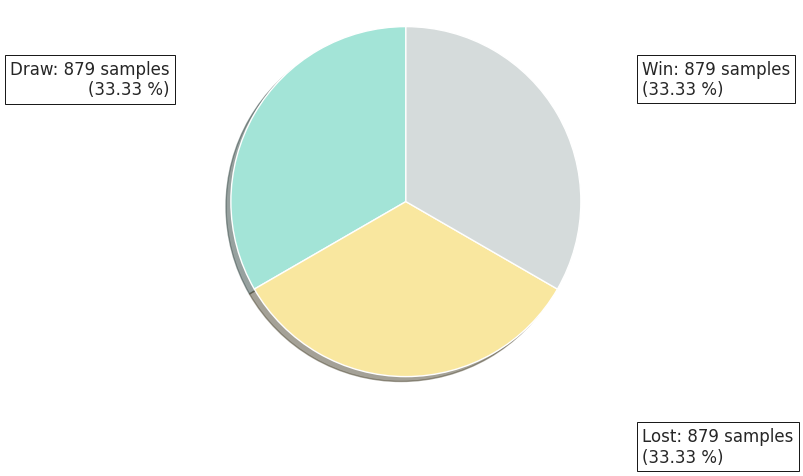

In [ ]:
print("Rows, Columns:",datos.shape)
Clases = datos.groupby('Win_Statues').size()
labels = Clases.index.values
sizes = Clases.values
print(Clases,labels,sizes)
muestra = []

for k in range(0,labels.size):
  texto = str(labels[k])+': '+str(sizes[k])+' samples\n({:,.2f} %)'.format((100*sizes[k]/sum(sizes)))
  muestra.append(texto)

colors = ['#A3E4D7','#F9E79F','#D5DBDB','#E6B0AA','#D7BDE2','#A9CCE3','#AEB6BF','#EDBB99','#5DADE2','#F4D03F','#27AE60','#A569BD','#C0392B','#138D75']
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),bbox=bbox_props, zorder=0, va="center")
fig,ax1 = plt.subplots(figsize=(10,5),ncols=1,nrows=1)
wedges, texts = ax1.pie(sizes, shadow=True, colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(muestra[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

#Preprocesamiento de Datos

###Definición de las caracteristicas (X) y la variable a estimar (Y) 

In [ ]:
X = datos.drop(['Win_Statues', 'team1', 'team2', 'score1', 'score2', 'adj_score1', 'adj_score2'], axis=1) #En el dataframe X quitamos la variable de respuesta "Label"
print(X.shape)

(2637, 11)


In [ ]:
le = LabelEncoder()
Y = datos['Win_Statues'].values.astype(str)
Y = le.fit_transform(Y)
print(Y.shape)
print("------------------------")
print(type(Y)) #Es un array
print("------------------------")
print(Y)

(2637,)
------------------------
<class 'numpy.ndarray'>
------------------------
[0 1 1 ... 1 1 1]


###Eliminación de Valores faltantes 


In [ ]:
missing = (X.isnull().sum() / len(X)).sort_values(ascending = False)
missing = missing.index[missing > 0.5]
all_missing = list(set(missing))
print('Hay %d columnas con mas del 50%% de los datos vacios' % len(all_missing))

Hay 0 columnas con mas del 50% de los datos vacios


### Remover caracteristicas con varianza cero


In [ ]:
from sklearn.feature_selection import VarianceThreshold
v_thres = VarianceThreshold(threshold=0)
v_thres.fit(X)
Cols = X.columns[v_thres.get_support()]
X = v_thres.transform(X)
X = pd.DataFrame(X,columns=Cols)
X.shape

(2637, 11)

###Identificar y eliminar colinealidades (alta correlacion) 

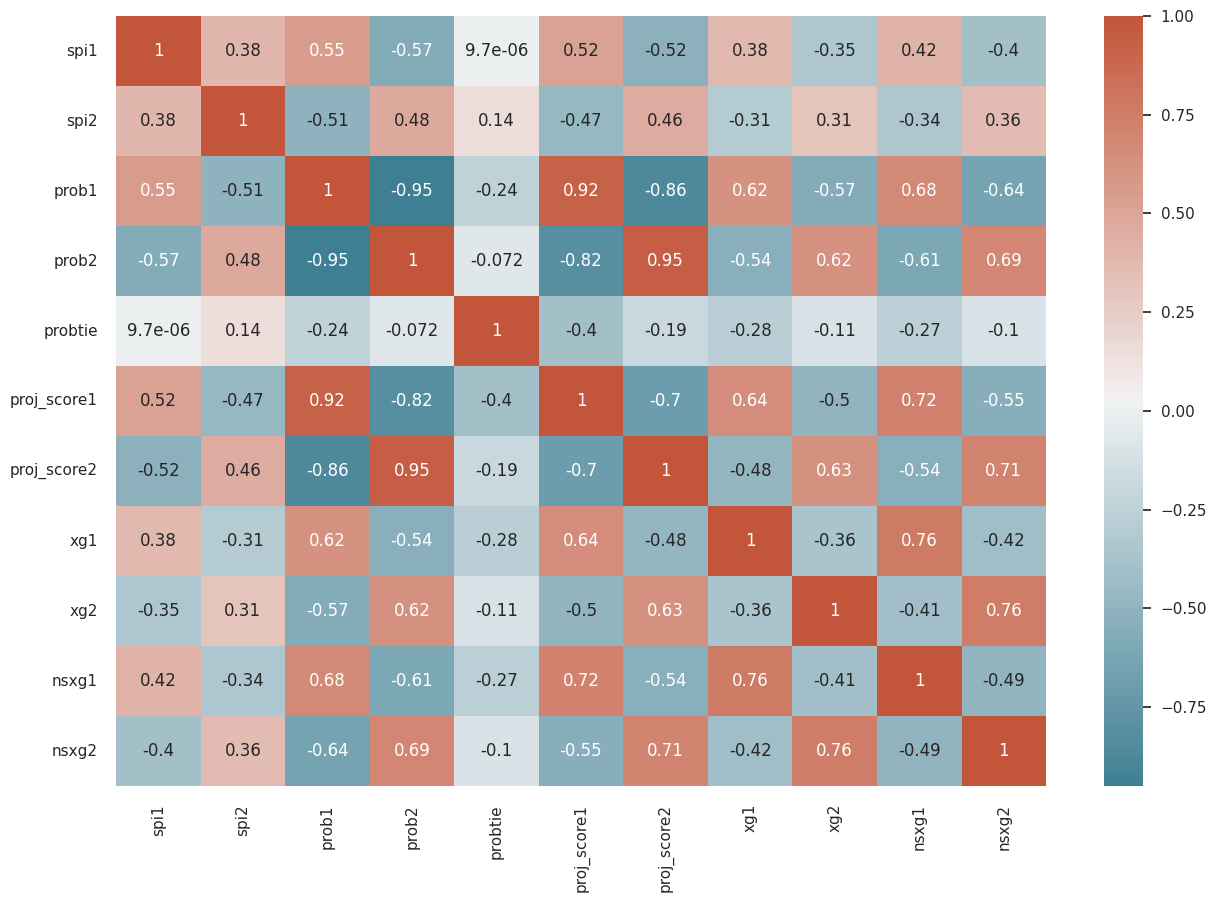

In [ ]:
corr = X.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

In [ ]:
#Threshold for removing correlated variables
threshold = 0.8
# Absolute value correlation matrix
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
#Select the colums with high threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('Hay %d columnas para remover.' % (len(to_drop)))
print(to_drop)


Hay 3 columnas para remover.
['prob2', 'proj_score1', 'proj_score2']


| Header | Definition |
| --- | --- |
| spi1 | The home team's overall SPI rating before the match |
| spi2 | The away team's overall SPI rating before the match |
| **prob1** | The probability of the home team winning the match |
| **prob2** | The probability of the away team winning the match |
| probtie | The probability of match ending in a draw (if applicable) |
| **proj_score1** | The number of goals we expected the home team to score |
| **proj_score2** | The number of goals we expected the away team to score |
| *score1* | The number of goals scored by the home team | 
| *score2* | The number of goals scored by the away team |
| xg1 | The number of expected goals created by the home team |
| xg2 | The number of expected goals created by the away team |
| nsxg1 | The number of non-shot expected goals created by the home team |
| nsxg2 | The number of non-shot expected goals created by the away team |
| adj_score1 | The number of goals scored by the home team, adjusted for game state |
| adj_score2 | The number of goals scored by the home team, adjusted for game state |


In [ ]:
X = X.drop(to_drop, axis=1)
print(X.shape) 

(2637, 8)


In [ ]:
X = X.drop(['prob1'], axis=1)
print(X.shape) 

(2637, 7)


In [ ]:
view = X.columns
print(view)

Index(['spi1', 'spi2', 'probtie', 'xg1', 'xg2', 'nsxg1', 'nsxg2'], dtype='object')


In [ ]:
Y_df= pd.DataFrame(Y, columns=['Win_Statues'])

In [ ]:
concat_df = pd.concat([X, Y_df], axis=1)

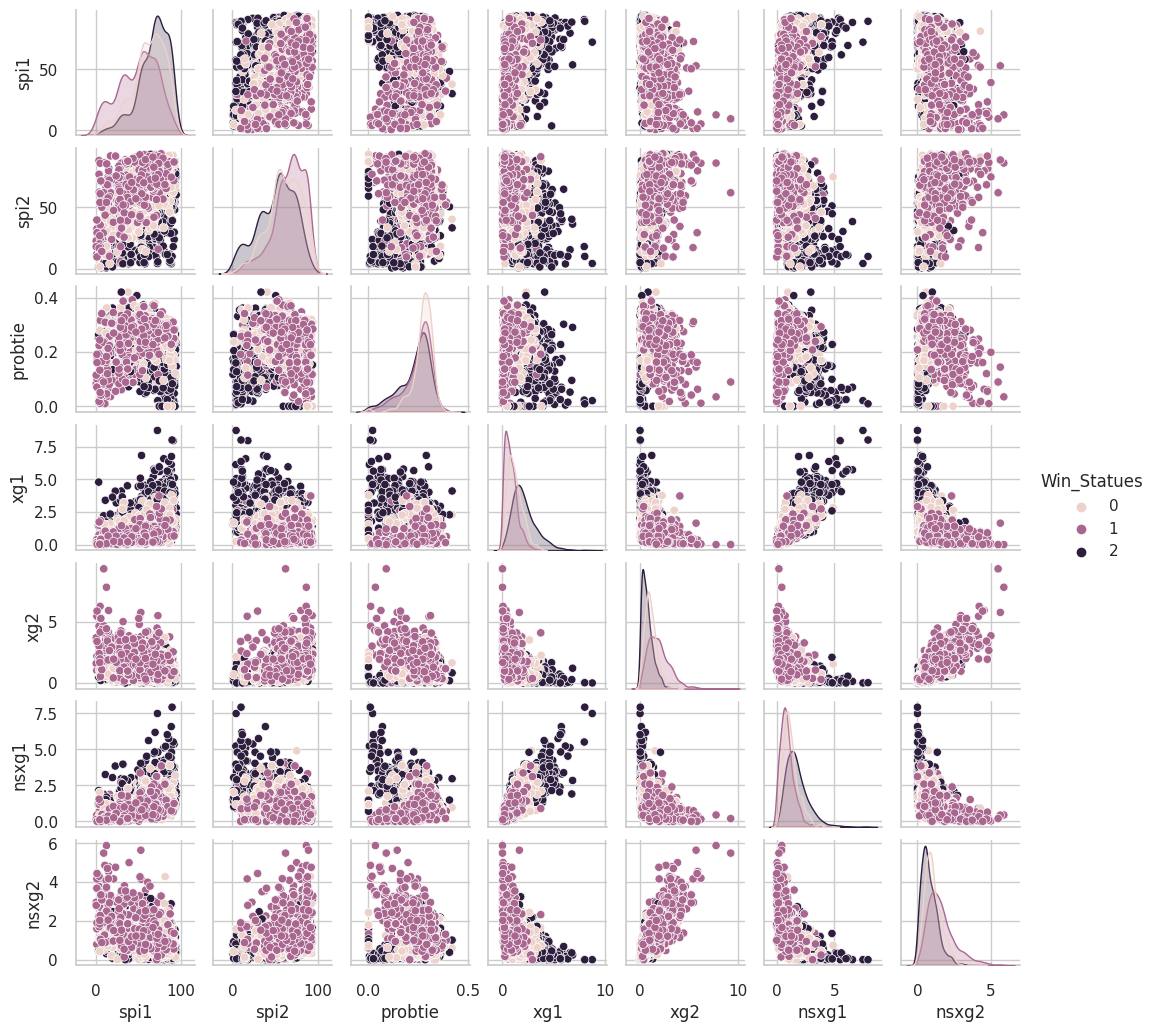

In [ ]:
sns.pairplot(concat_df,hue="Win_Statues",height=1.5)
plt.show()

##Normalización

In [ ]:
scaler1 = MinMaxScaler(feature_range=(0, 1))
scaler1.fit(X)
X_n = scaler1.transform(X)
X_n = np.array(X_n)

##División del Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y, test_size = 0.2, stratify=Y, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2109, 7)
(528, 7)
(2109,)
(528,)


#Métodos

##Método 1:  Percerptrón (Monocapa)

### Selección de Hiperparámetros

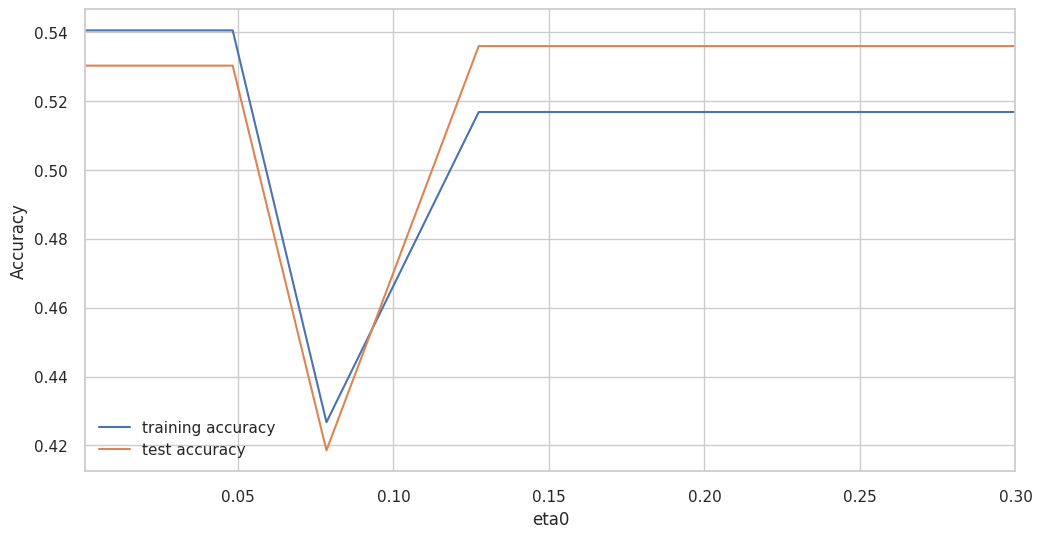

In [ ]:
training_accuracy = []
test_accuracy = []
eta0 = np.logspace(-3,1,20)
for eta in eta0:
    clf = Perceptron(max_iter=100, eta0=eta, random_state=42)
    clf.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, Y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, Y_test))
fig, axe = plt.subplots(ncols=1,figsize=(12, 6)) 
plt.plot(eta0, training_accuracy, label="training accuracy")
plt.plot(eta0, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("eta0")
plt.xlim(0.001, 0.3)
plt.legend()
plt.show()

###Crear y Entrenar el perceptrón

In [ ]:
clf_per = Perceptron(max_iter=100, eta0=0.15, random_state=42)
clf_per.fit(X_train,Y_train.ravel())

Perceptron(eta0=0.15, max_iter=100, random_state=42)

### Prueba con datos de entrenamiento

Accuracy: 0.5168


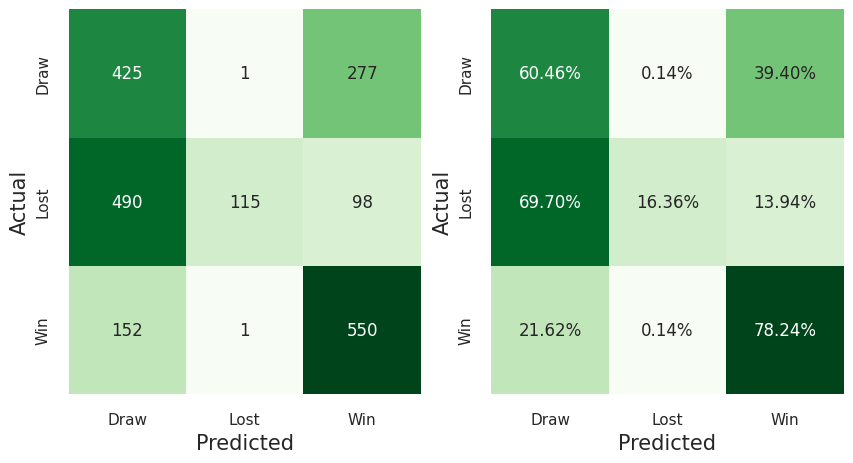

In [ ]:
fig, ax = plt.subplots(figsize=(10,5),ncols=2,nrows=1)
y_pred_per = clf_per.predict(X_train)
print('Accuracy: %.4f' % accuracy_score(Y_train, y_pred_per))
sns.heatmap(confusion_matrix(Y_train, y_pred_per), fmt=".0f",
            annot=True, xticklabels=labels, yticklabels=labels, 
            ax=ax[0], cbar=False, cmap="Greens")
sns.heatmap(confusion_matrix(Y_train, y_pred_per, normalize='true'), fmt=".2%",
            annot=True, xticklabels=labels, yticklabels=labels,
            ax=ax[1], cbar=False, cmap="Greens")
ax[0].set_xlabel('Predicted', fontsize = 15)
ax[0].set_ylabel('Actual', fontsize = 15)
ax[1].set_xlabel('Predicted', fontsize = 15)
ax[1].set_ylabel('Actual', fontsize = 15)
fig.show()

### Prueba con datos de validación

Accuracy: 0.5360


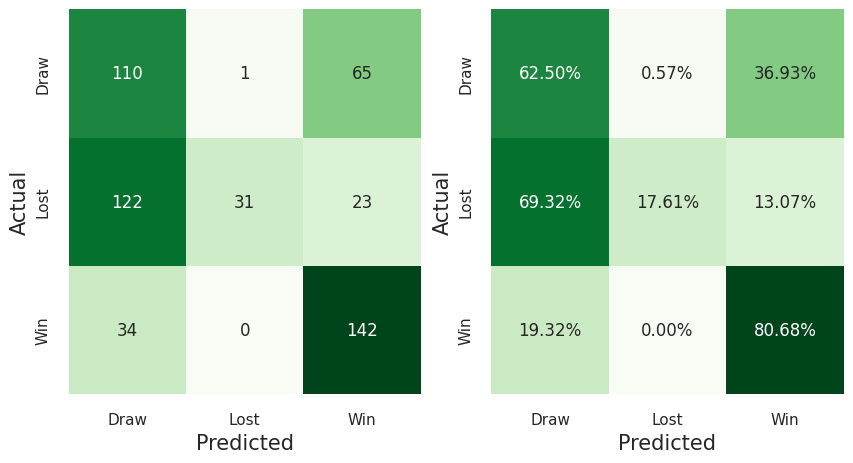

In [ ]:
fig, ax = plt.subplots(figsize=(10,5),ncols=2,nrows=1)
y_pred_per = clf_per.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(Y_test, y_pred_per))
sns.heatmap(confusion_matrix(Y_test, y_pred_per), fmt=".0f",
            xticklabels=labels, yticklabels=labels, annot=True,
            ax=ax[0], cbar=False, cmap="Greens")
sns.heatmap(confusion_matrix(Y_test, y_pred_per, normalize='true'), fmt=".2%",
            annot=True, xticklabels=labels, yticklabels=labels, 
            ax=ax[1], cbar=False, cmap="Greens")
ax[0].set_xlabel('Predicted', fontsize = 15)
ax[0].set_ylabel('Actual', fontsize = 15)
ax[1].set_xlabel('Predicted', fontsize = 15)
ax[1].set_ylabel('Actual', fontsize = 15)
fig.show()

## Método 2: Arboles de decisión

### Selección de Hiperparámetros

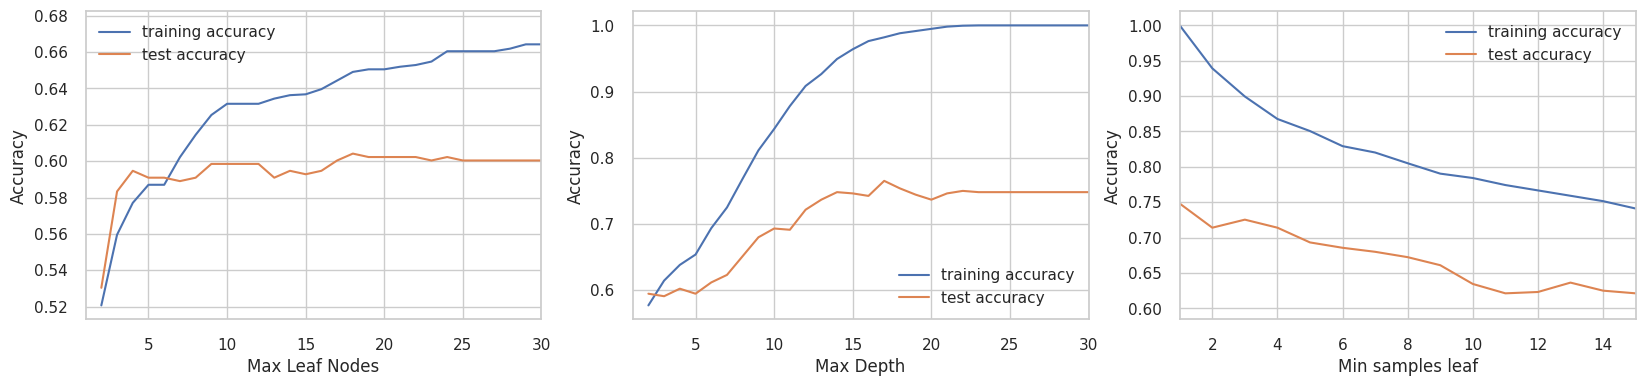

In [ ]:
training_accuracy_l1 = []
test_accuracy_l1 = []
max_leaf_nodes = range(2, 35, 1)
for leaf_nodes in max_leaf_nodes:
    # build the model
    clf = DecisionTreeClassifier(max_leaf_nodes=leaf_nodes, random_state=42)
    clf.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy_l1.append(clf.score(X_train, Y_train))
    # record generalization accuracy
    test_accuracy_l1.append(clf.score(X_test, Y_test))
training_accuracy_l2 = []
test_accuracy_l2 = []
max_depth = range(2, 31, 1)
for depth in max_depth:
    # build the model
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy_l2.append(clf.score(X_train, Y_train))
    # record generalization accuracy
    test_accuracy_l2.append(clf.score(X_test, Y_test))
training_accuracy_l3 = []
test_accuracy_l3 = []
min_samples_leaf = range(1, 20, 1)
for samples_leaf in min_samples_leaf:
    # build the model
    clf = DecisionTreeClassifier(min_samples_leaf=samples_leaf,random_state=42)
    clf.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy_l3.append(clf.score(X_train, Y_train))
    # record generalization accuracy
    test_accuracy_l3.append(clf.score(X_test, Y_test))    
fig, axe = plt.subplots(ncols=3,figsize=(20, 4))
plt.subplot(1,3,1)
plt.plot(max_leaf_nodes, training_accuracy_l1, label="training accuracy")
plt.plot(max_leaf_nodes, test_accuracy_l1, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Max Leaf Nodes")
plt.xlim(1, 30)
plt.legend()
plt.subplot(1,3,2)
plt.plot(max_depth, training_accuracy_l2, label="training accuracy")
plt.plot(max_depth, test_accuracy_l2, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Max Depth")
plt.xlim(1, 30)
plt.legend()
plt.subplot(1,3,3)
plt.plot(min_samples_leaf, training_accuracy_l3, label="training accuracy")
plt.plot(min_samples_leaf, test_accuracy_l3, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Min samples leaf")
plt.xlim(1, 15)
plt.legend()
plt.show()

###Crear y Entrenar el Arbol de Decisión

In [ ]:
clf_DT =DecisionTreeClassifier(random_state=42,max_depth = 23)
clf_DT.fit(X_train,Y_train.ravel())

DecisionTreeClassifier(max_depth=23, random_state=42)

###Análisis del arbol de Decisión

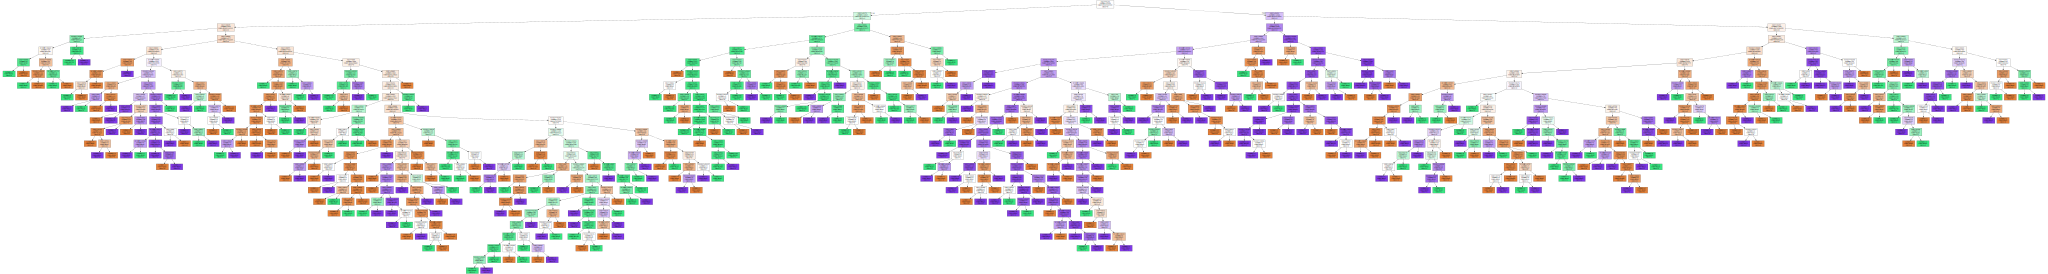

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(clf_DT, out_file = "arbol.dot", class_names=["0","1","2"], 
                feature_names = view, impurity=False, filled=True)
with open("arbol.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

### Feature Importance

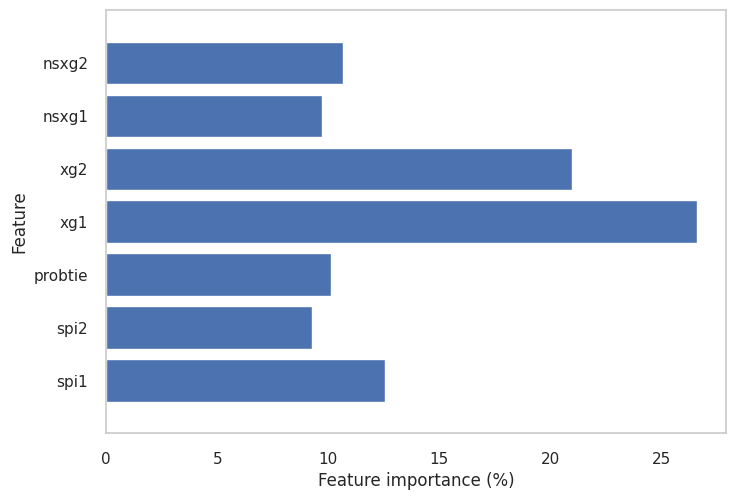

In [ ]:
n_features = view.shape[0]
plt.barh(range(n_features),clf_DT.feature_importances_*100, align='center')
plt.yticks(np.arange(n_features), view)
plt.xlabel("Feature importance (%)")
plt.ylabel("Feature")
plt.grid("")
plt.ylim(-1,n_features)
plt.show()

### Prueba con datos de entrenamiento

Accuracy: 1.00


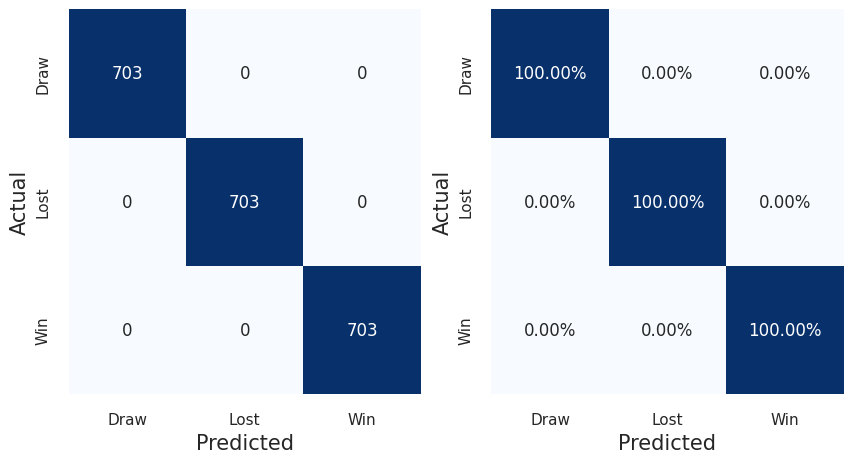

In [ ]:
fig, ax = plt.subplots(figsize=(10,5),ncols=2,nrows=1)
y_pred_DT = clf_DT.predict(X_train)
print('Accuracy: %.2f' % accuracy_score(Y_train, y_pred_DT))
sns.heatmap(confusion_matrix(Y_train, y_pred_DT), fmt=".0f", 
            annot=True, ax=ax[0], xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Blues");
sns.heatmap(confusion_matrix(Y_train, y_pred_DT, normalize='true'), fmt=".2%",
            annot=True, ax=ax[1], xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Blues");
ax[0].set_xlabel('Predicted', fontsize = 15)
ax[0].set_ylabel('Actual', fontsize = 15)
ax[1].set_xlabel('Predicted', fontsize = 15)
ax[1].set_ylabel('Actual', fontsize = 15)
fig.show()

### Prueba con datos de validación

Accuracy: 0.7481


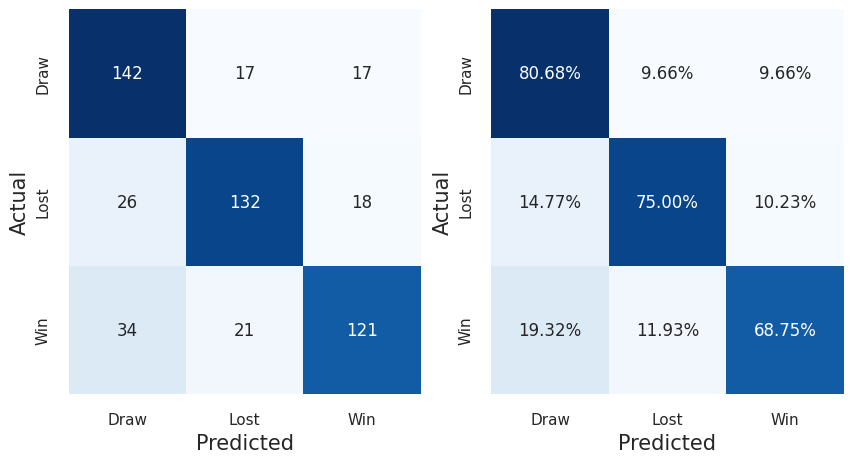

In [ ]:
fig, ax = plt.subplots(figsize=(10,5),ncols=2,nrows=1)
y_pred_DT = clf_DT.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(Y_test, y_pred_DT))
sns.heatmap(confusion_matrix(Y_test, y_pred_DT), fmt=".0f",
            annot=True, ax=ax[0],xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Blues");
sns.heatmap(confusion_matrix(Y_test, y_pred_DT, normalize='true'), fmt=".2%",
            annot=True, ax=ax[1],xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Blues");
ax[0].set_xlabel('Predicted', fontsize = 15)
ax[0].set_ylabel('Actual', fontsize = 15)
ax[1].set_xlabel('Predicted', fontsize = 15)
ax[1].set_ylabel('Actual', fontsize = 15)
fig.show()

## Método 3: Regresión Logística

### Selección de Hiperparámetros

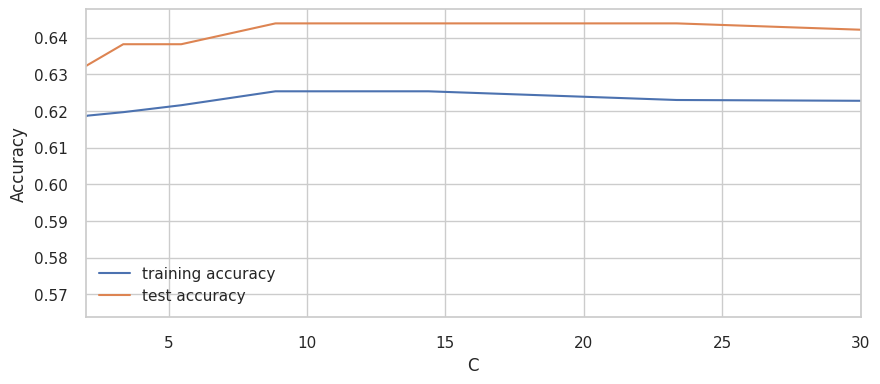

In [ ]:
training_accuracy_l = []
test_accuracy_l = []
C = np.logspace(-2,2,20) 
for C_p in C:
    # build the model
    clf = LogisticRegression(C=C_p,random_state=42, solver='newton-cg')
    clf.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy_l.append(clf.score(X_train, Y_train))
    # record generalization accuracy
    test_accuracy_l.append(clf.score(X_test, Y_test))
fig, axe = plt.subplots(ncols=1,figsize=(10, 4))
plt.plot(C, training_accuracy_l, label="training accuracy")
plt.plot(C, test_accuracy_l, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.xlim(2, 30)
plt.legend()
plt.show()

### Crear y entrenar la regresión logística

In [ ]:
clf_log = LogisticRegression(C=10, solver='newton-cg', random_state=42)
clf_log.fit(X_train, Y_train.ravel())

LogisticRegression(C=10, random_state=42, solver='newton-cg')

### Prueba con datos de entrenamiento

Accuracy: 0.6249


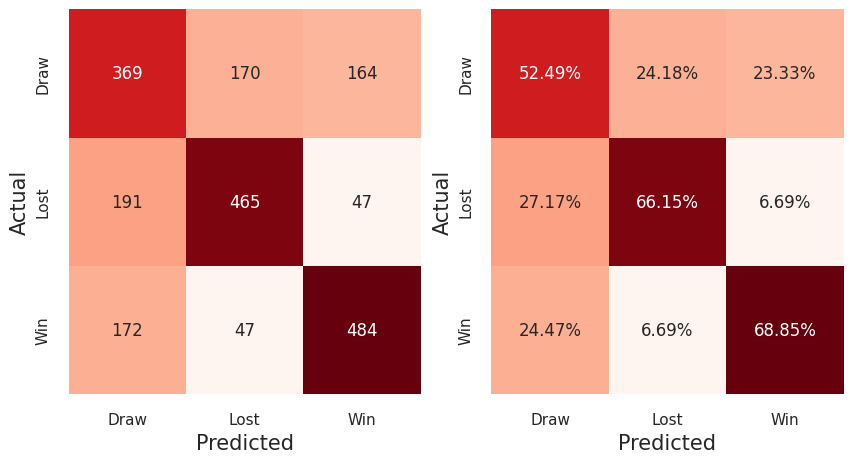

In [ ]:
# Apply the trained perceptron on the X data to make predicts for the y test data
y_pred_log = clf_log.predict(X_train)
print('Accuracy: %.4f' % accuracy_score(Y_train, y_pred_log))
fig, ax = plt.subplots(figsize=(10,5),ncols=2,nrows=1)
sns.heatmap(confusion_matrix(Y_train, y_pred_log), fmt=".0f",
            annot=True, ax=ax[0], xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Reds");
sns.heatmap(confusion_matrix(Y_train, y_pred_log, normalize='true'), fmt=".2%",
            annot=True, ax=ax[1], xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Reds");
ax[0].set_xlabel('Predicted', fontsize = 15)
ax[0].set_ylabel('Actual', fontsize = 15)
ax[1].set_xlabel('Predicted', fontsize = 15)
ax[1].set_ylabel('Actual', fontsize = 15)
fig.show()

###Prueba con datos de validación

Accuracy: 0.6439


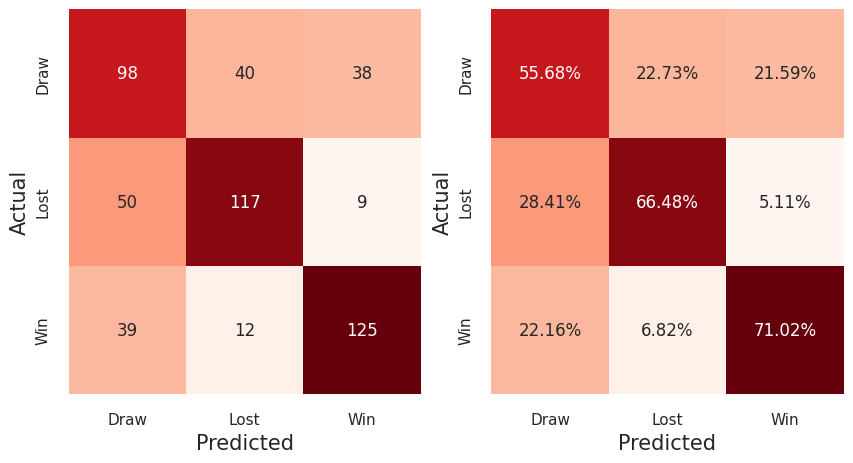

In [ ]:
y_pred_log = clf_log.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(Y_test, y_pred_log))
fig, ax = plt.subplots(figsize=(10,5),ncols=2,nrows=1)
sns.heatmap(confusion_matrix(Y_test, y_pred_log), fmt=".0f",
            annot=True, ax=ax[0], xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Reds")
sns.heatmap(confusion_matrix(Y_test, y_pred_log, normalize='true'), fmt=".2%",
            annot=True, ax=ax[1], xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Reds")
ax[0].set_xlabel('Predicted', fontsize = 15)
ax[0].set_ylabel('Actual', fontsize = 15)
ax[1].set_xlabel('Predicted', fontsize = 15)
ax[1].set_ylabel('Actual', fontsize = 15)
fig.show()

##Metodo 4: Máquinas de Soporte Vectorial (SVM)


### Selección de Hiperparámetros

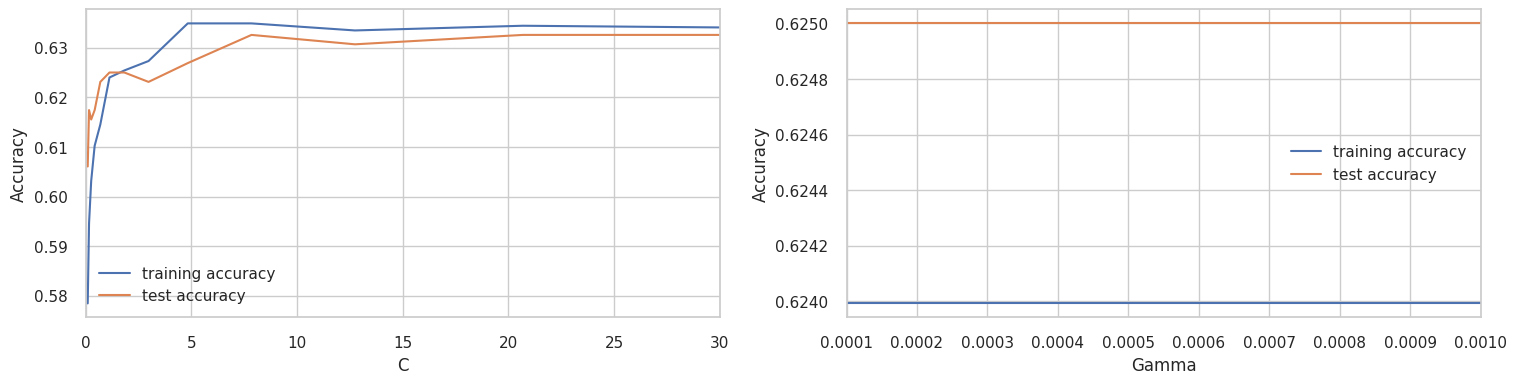

In [ ]:
training_accuracy_l1 = []
test_accuracy_l1 = []
C = np.logspace(-1,3,20) 
for C_p in C:
    # build the model
    clf = SVC(C=C_p,random_state=42,kernel='linear')  #si es necesario cambiar kernel !!!!!
    clf.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy_l1.append(clf.score(X_train, Y_train))
    # record generalization accuracy
    test_accuracy_l1.append(clf.score(X_test, Y_test))
training_accuracy_l2 = []
test_accuracy_l2 = []
gamma = np.logspace(-4,-3,20) 
for gamma_p in gamma:
    # build the model
    clf = SVC(gamma=gamma_p,random_state=42,kernel='linear')
    clf.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy_l2.append(clf.score(X_train, Y_train))
    # record generalization accuracy
    test_accuracy_l2.append(clf.score(X_test, Y_test))
fig, axe = plt.subplots(ncols=2,figsize=(18, 4))
plt.subplot(1,2,1)
plt.plot(C, training_accuracy_l1, label="training accuracy")
plt.plot(C, test_accuracy_l1, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.xlim(0, 30)
plt.legend()
plt.subplot(1,2,2)
plt.plot(gamma, training_accuracy_l2, label="training accuracy")
plt.plot(gamma, test_accuracy_l2, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Gamma")
plt.xlim(0.0001, 0.001)
plt.legend()
plt.show()

### Creación del SVM

In [ ]:
from sklearn.pipeline import Pipeline
clf_svm = SVC(C=25, random_state=42, kernel='linear')
clf_svm.fit(X_train, Y_train.ravel())

SVC(C=25, kernel='linear', random_state=42)

### Prueba con datos de entrenamiento

Accuracy: 0.6349


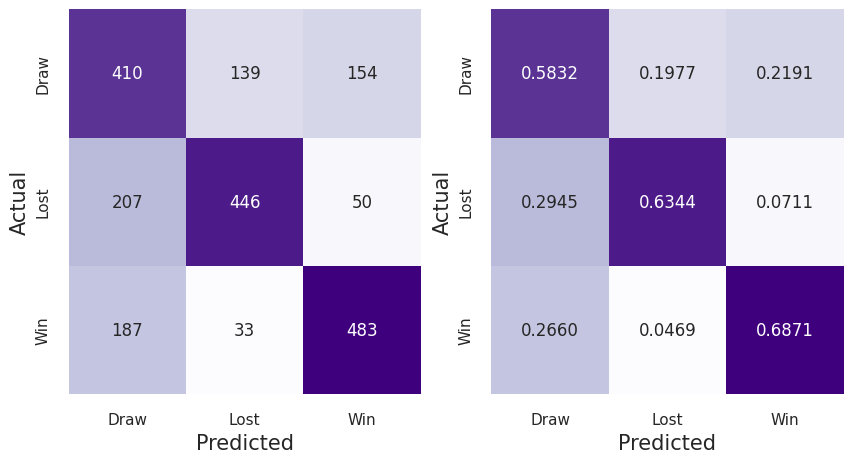

In [ ]:
fig, ax = plt.subplots(figsize=(10,5),ncols=2,nrows=1)
y_pred_svm = clf_svm.predict(X_train)
print('Accuracy: %.4f' % accuracy_score(Y_train, y_pred_svm))
sns.heatmap(confusion_matrix(Y_train, y_pred_svm), fmt=".0f",
            annot=True, ax=ax[0], xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Purples")
sns.heatmap(confusion_matrix(Y_train, y_pred_svm, normalize='true'), fmt=".4f",
            annot=True, ax=ax[1], xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Purples")
ax[0].set_xlabel('Predicted', fontsize = 15)
ax[0].set_ylabel('Actual', fontsize = 15)
ax[1].set_xlabel('Predicted', fontsize = 15)
ax[1].set_ylabel('Actual', fontsize = 15)
fig.show()

###Prueba con datos de validación

Accuracy: 0.6326


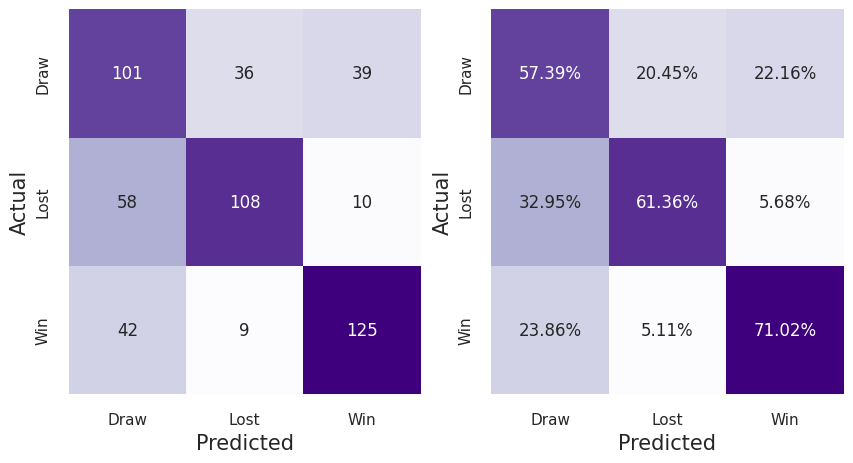

In [ ]:
fig, ax = plt.subplots(figsize=(10,5),ncols=2,nrows=1)
y_pred_svm = clf_svm.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(Y_test, y_pred_svm))
sns.heatmap(confusion_matrix(Y_test, y_pred_svm), fmt=".0f",
            annot=True, ax=ax[0], xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Purples")
sns.heatmap(confusion_matrix(Y_test, y_pred_svm, normalize='true'), fmt=".2%",
            annot=True, ax=ax[1], xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Purples")
ax[0].set_xlabel('Predicted', fontsize = 15)
ax[0].set_ylabel('Actual', fontsize = 15)
ax[1].set_xlabel('Predicted', fontsize = 15)
ax[1].set_ylabel('Actual', fontsize = 15)
fig.show()

# Algunas Visualizaciones de métricas

In [ ]:
# Specify the target classes
classes = list(Clases.index)
# select classifiers 
classifiers=[clf_per, clf_DT, clf_log, clf_svm]

## Classification Report

### Datos de entrenamiento

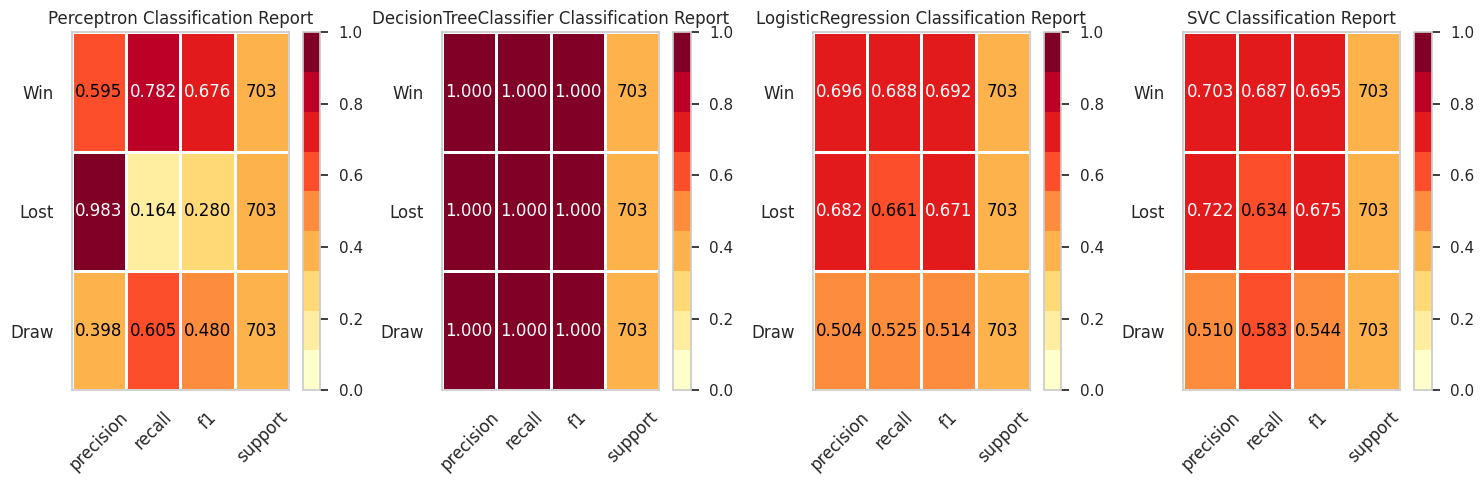

In [ ]:
fig, axe = plt.subplots(ncols=4,nrows=1,figsize=(15, 5)) 
fig.tight_layout(pad=8.0)  
visualgrid = [ClassificationReport(classifiers[0], classes=classes, support=True, force_model=True, ax=axe[0]),
              ClassificationReport(classifiers[1], classes=classes, support=True,ax=axe[1]),
              ClassificationReport(classifiers[2], classes=classes, support=True,ax=axe[2]),
              ClassificationReport(classifiers[3], classes=classes, support=True,ax=axe[3])]
for viz in visualgrid:
  viz.fit(X_train, Y_train)
  viz.score(X_train, Y_train)
  viz.finalize()
fig.show()

### Datos de prueba

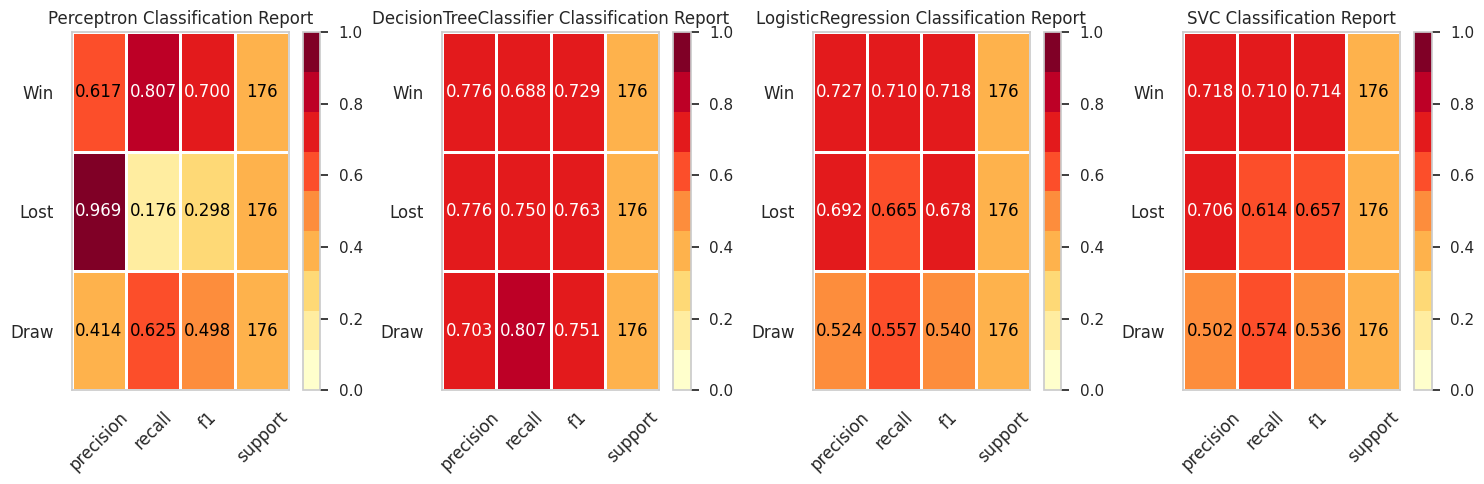

In [ ]:
#@title
fig, axe = plt.subplots(ncols=4,nrows=1,figsize=(15, 5)) 
fig.tight_layout(pad=8.0)  
visualgrid = [ClassificationReport(classifiers[0], classes=classes, support=True,ax=axe[0]),
              ClassificationReport(classifiers[1], classes=classes, support=True,ax=axe[1]),
              ClassificationReport(classifiers[2], classes=classes, support=True,ax=axe[2]),
              ClassificationReport(classifiers[3], classes=classes, support=True,ax=axe[3])]
counter1 = 0
for viz in visualgrid:
  viz.fit(X_train, Y_train)
  viz.score(X_test, Y_test)
  viz.finalize()
fig.show()

## Class Prediction Error (CPE)

### Datos de entrenamiento

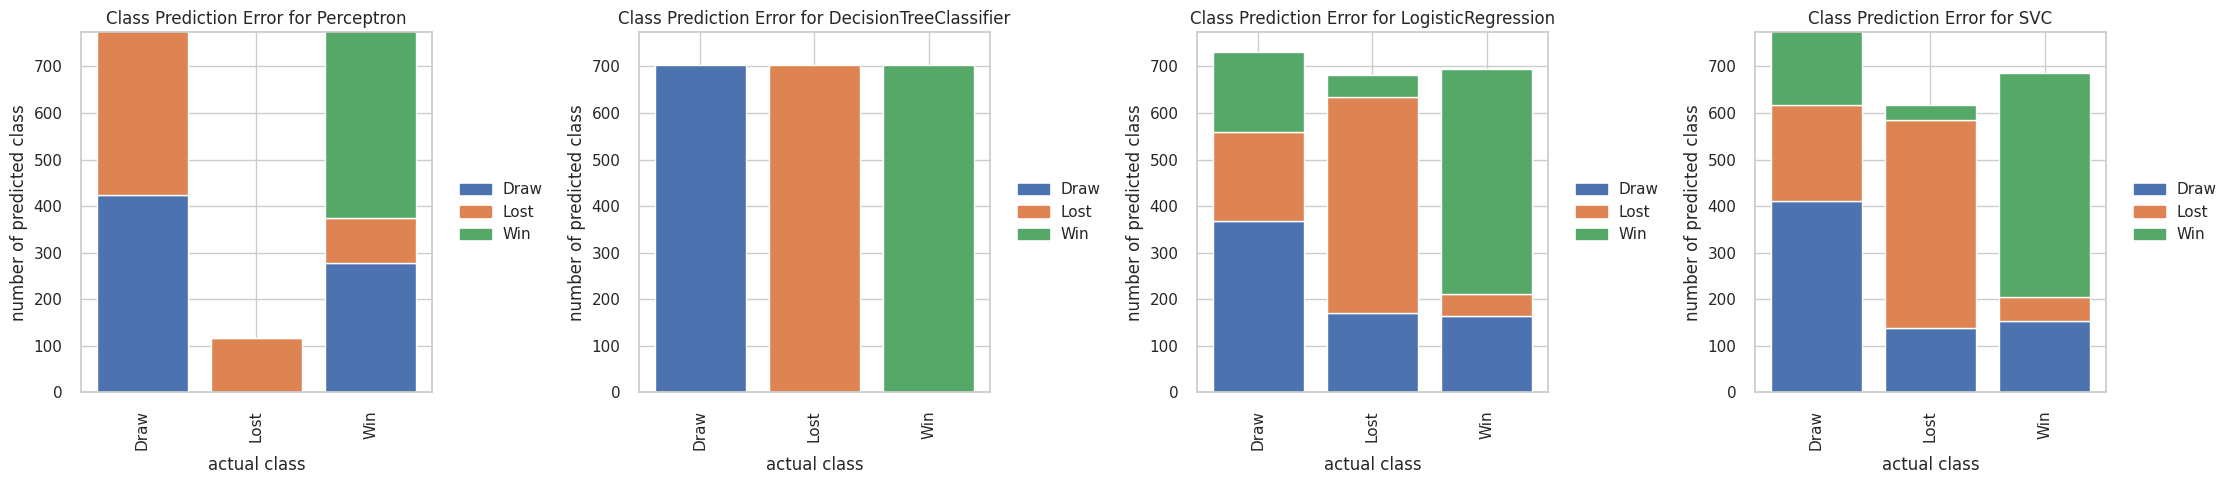

In [ ]:
fig, axe = plt.subplots(ncols=4,figsize=(25, 5)) 
fig.tight_layout(pad=8.0)  
visualgrid = [ClassPredictionError(classifiers[0], classes=classes, ax=axe[0]),
              ClassPredictionError(classifiers[1], classes=classes, ax=axe[1]),
              ClassPredictionError(classifiers[2], classes=classes, ax=axe[2]),
              ClassPredictionError(classifiers[3], classes=classes, ax=axe[3])]

for viz in visualgrid:
  viz.fit(X_train, Y_train)
  viz.score(X_train, Y_train)
  viz.finalize()

plt.show()

### Datos de validación

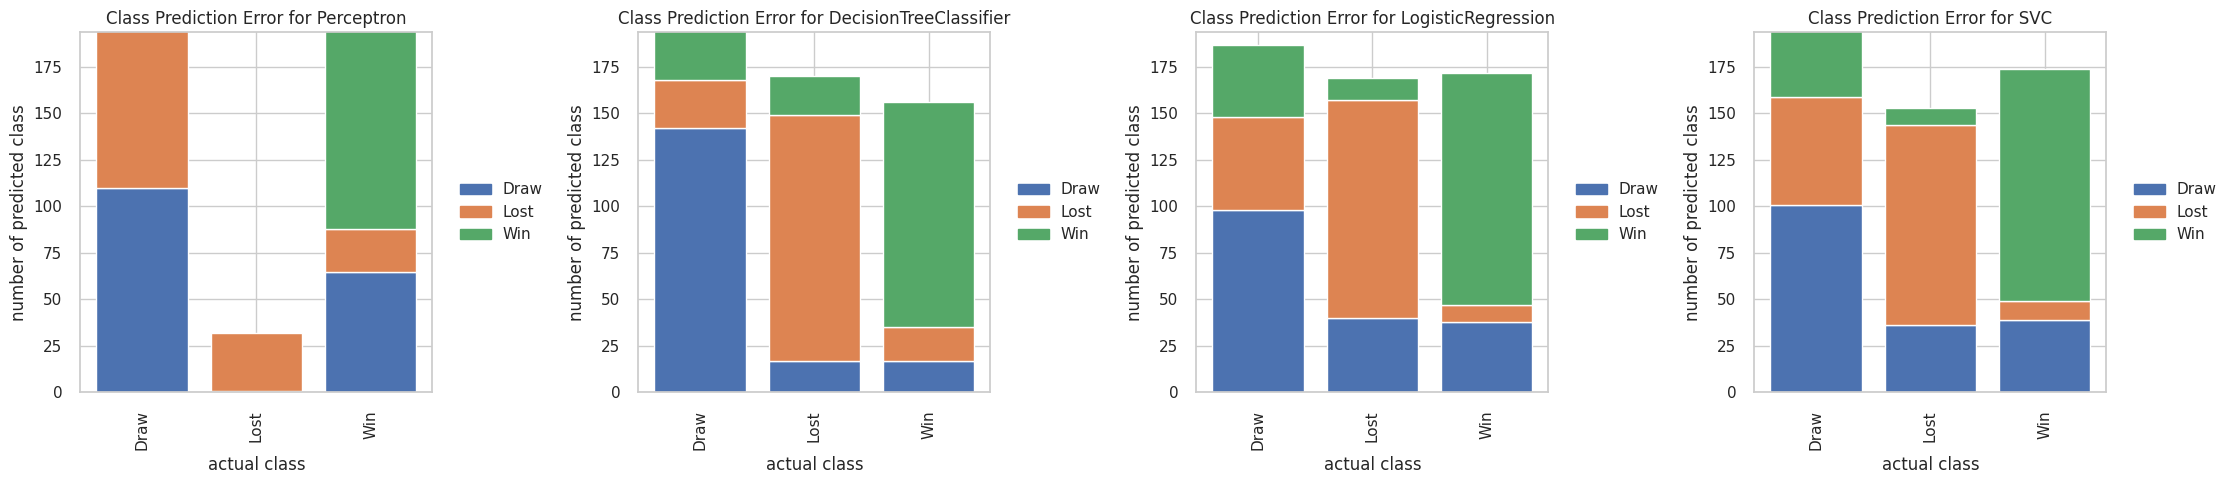

In [ ]:
fig, axe = plt.subplots(ncols=4,figsize=(25, 5)) 
fig.tight_layout(pad=8.0)  
visualgrid = [ClassPredictionError(classifiers[0], classes=classes, ax=axe[0]),
              ClassPredictionError(classifiers[1], classes=classes, ax=axe[1]),
              ClassPredictionError(classifiers[2], classes=classes, ax=axe[2]),
              ClassPredictionError(classifiers[3], classes=classes, ax=axe[3])]

for viz in visualgrid:
  viz.fit(X_train, Y_train)
  viz.score(X_test, Y_test)
  viz.finalize()

plt.show()